# Examining COVID-19 Vaccination Rates in California

### How are race/ethnicity and income related to vaccination rates?

Sean Yang

In [ ]:
from datascience import *
import pandas as pd
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import array
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

## Association between race/ethnicity and COVID-19 vaccination rates

In [ ]:
raw_table = Table().read_table('covid19vaccinesbycountybydemographic.csv')
raw_table

county,county_type,demographic_category,demographic_value,est_population,est_age_12plus_pop,est_age_5plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,cumulative_unvax_5plus_pop,suppress_data
Alameda,MIXED,Age Group,12-17,118800,118800,118800,2021-11-12,97,6495,72,95090,97,101585,17215,17215,17215,False
Alameda,MIXED,Age Group,12-17,118800,118800,118800,2021-11-11,118,6470,61,95018,118,101488,17312,17312,17312,False
Alameda,MIXED,Age Group,12-17,118800,118800,118800,2021-11-10,160,6413,130,94957,160,101370,17430,17430,17430,False
Alameda,MIXED,Age Group,12-17,118800,118800,118800,2021-11-09,77,6383,63,94827,77,101210,17590,17590,17590,False
Alameda,MIXED,Age Group,12-17,118800,118800,118800,2021-11-08,67,6369,79,94764,67,101133,17667,17667,17667,False
Alameda,MIXED,Age Group,12-17,118800,118800,118800,2021-11-07,27,6381,25,94685,27,101066,17734,17734,17734,False
Alameda,MIXED,Age Group,12-17,118800,118800,118800,2021-11-06,65,6379,90,94660,65,101039,17761,17761,17761,False
Alameda,MIXED,Age Group,12-17,118800,118800,118800,2021-11-05,128,6404,161,94570,128,100974,17826,17826,17826,False
Alameda,MIXED,Age Group,12-17,118800,118800,118800,2021-11-04,57,6437,99,94409,57,100846,17954,17954,17954,False
Alameda,MIXED,Age Group,12-17,118800,118800,118800,2021-11-03,87,6479,94,94310,87,100789,18011,18011,18011,False


In [ ]:
race_table = raw_table.where('demographic_category', 'Race/Ethnicity').drop('county_type', 'demographic_category')
race_table

county,demographic_value,est_population,est_age_12plus_pop,est_age_5plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,cumulative_unvax_5plus_pop,suppress_data
Alameda,American Indian or Alaska Native,4920,4168,4607,2021-11-12,7,419,3,3464,7,3883,1037,285,724,False
Alameda,American Indian or Alaska Native,4920,4168,4607,2021-11-11,11,415,1,3461,11,3876,1044,292,731,False
Alameda,American Indian or Alaska Native,4920,4168,4607,2021-11-10,21,405,2,3460,21,3865,1055,303,742,False
Alameda,American Indian or Alaska Native,4920,4168,4607,2021-11-09,7,386,1,3458,8,3844,1076,324,763,False
Alameda,American Indian or Alaska Native,4920,4168,4607,2021-11-08,9,379,3,3457,11,3836,1084,332,771,False
Alameda,American Indian or Alaska Native,4920,4168,4607,2021-11-07,2,371,0,3454,2,3825,1095,343,782,False
Alameda,American Indian or Alaska Native,4920,4168,4607,2021-11-06,3,369,4,3454,4,3823,1097,345,784,False
Alameda,American Indian or Alaska Native,4920,4168,4607,2021-11-05,7,369,1,3450,7,3819,1101,349,788,False
Alameda,American Indian or Alaska Native,4920,4168,4607,2021-11-04,1,363,1,3449,1,3812,1108,356,795,False
Alameda,American Indian or Alaska Native,4920,4168,4607,2021-11-03,5,363,0,3448,5,3811,1109,357,796,False


The different race/ethnicity categories in "race_table" are American Indian or Alaska Native, Asian, Black or African American, Latino, Multiracial, Native Hawaiian or Other Pacific Islander, Other Race, Unknown and White. Since the table is sorted according to the administration date of the vaccine, we decided to clean the table by only keeping the rows of the most recent administration date (11/12/2021).

In [ ]:
race_and_county_vax = race_table.where("administered_date", "2021-11-12")
race_and_county_vax

county,demographic_value,est_population,est_age_12plus_pop,est_age_5plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,cumulative_unvax_5plus_pop,suppress_data
Alameda,American Indian or Alaska Native,4920,4168,4607,2021-11-12,7,419,3,3464,7,3883,1037,285,724,False
Alameda,Asian,442180,389320,420851,2021-11-12,1115,25938,114,393032,1122,418970,23210,0,1881,False
Alameda,Black or African American,192346,170376,183187,2021-11-12,153,8078,103,95089,168,103167,89179,67209,80020,False
Alameda,Latino,392842,330446,369205,2021-11-12,396,18912,133,213925,416,232837,160005,97609,136368,False
Alameda,Multiracial,71378,55468,64602,2021-11-12,113,1781,9,27683,115,29464,41914,26004,35138,False
Alameda,Native Hawaiian or Other Pacific Islander,13474,11834,12890,2021-11-12,20,794,4,9032,20,9826,3648,2008,3064,False
Alameda,Other Race,nan,nan,nan,2021-11-12,341,9521,63,82397,347,91918,nan,nan,nan,False
Alameda,Unknown,nan,nan,nan,2021-11-12,125,6910,26,37221,132,44131,nan,nan,nan,False
Alameda,White,561194,495166,533831,2021-11-12,694,21951,90,347930,701,369881,191313,125285,163950,False
Alpine,American Indian or Alaska Native,213,195,208,2021-11-12,0,2,0,13,0,15,198,180,193,False


In [ ]:
# adding the percent of population fully vaccinated and with one dose of the vaccine to the table

race_and_county_vax = race_and_county_vax.relabeled('est_age_5plus_pop', 'eligible population')
fully_vax_percent = 100*race_and_county_vax.column('cumulative_fully_vaccinated')/race_and_county_vax.column('eligible population')
one_dose_percent = 100*race_and_county_vax.column('cumulative_unvax_total_pop')/race_and_county_vax.column('eligible population')
race_and_county_vax = race_and_county_vax.with_columns('percent_fully_vaccinated', fully_vax_percent, 'percent_one_dose', one_dose_percent)
race_and_county_vax

county,demographic_value,est_population,est_age_12plus_pop,eligible population,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,cumulative_unvax_5plus_pop,suppress_data,percent_fully_vaccinated,percent_one_dose
Alameda,American Indian or Alaska Native,4920,4168,4607,2021-11-12,7,419,3,3464,7,3883,1037,285,724,False,75.1899,22.5092
Alameda,Asian,442180,389320,420851,2021-11-12,1115,25938,114,393032,1122,418970,23210,0,1881,False,93.3898,5.51502
Alameda,Black or African American,192346,170376,183187,2021-11-12,153,8078,103,95089,168,103167,89179,67209,80020,False,51.9082,48.6819
Alameda,Latino,392842,330446,369205,2021-11-12,396,18912,133,213925,416,232837,160005,97609,136368,False,57.9421,43.3377
Alameda,Multiracial,71378,55468,64602,2021-11-12,113,1781,9,27683,115,29464,41914,26004,35138,False,42.8516,64.8803
Alameda,Native Hawaiian or Other Pacific Islander,13474,11834,12890,2021-11-12,20,794,4,9032,20,9826,3648,2008,3064,False,70.0698,28.301
Alameda,Other Race,nan,nan,nan,2021-11-12,341,9521,63,82397,347,91918,nan,nan,nan,False,nan,nan
Alameda,Unknown,nan,nan,nan,2021-11-12,125,6910,26,37221,132,44131,nan,nan,nan,False,nan,nan
Alameda,White,561194,495166,533831,2021-11-12,694,21951,90,347930,701,369881,191313,125285,163950,False,65.1761,35.8377
Alpine,American Indian or Alaska Native,213,195,208,2021-11-12,0,2,0,13,0,15,198,180,193,False,6.25,95.1923


Looking at the table, we noticed that many values in the "Other Race" and "Unknown" categories are nan. Checking the percentages in the table that are over 100:

In [ ]:
above_100 = race_and_county_vax.where('percent_fully_vaccinated', are.above(100))
above_100.show()

county,demographic_value,est_population,est_age_12plus_pop,eligible population,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,cumulative_unvax_5plus_pop,suppress_data,percent_fully_vaccinated,percent_one_dose
Amador,Native Hawaiian or Other Pacific Islander,66,57,61,2021-11-12,0,10,0,64,0,74,0,0,0,False,104.918,0
Contra Costa,Native Hawaiian or Other Pacific Islander,5274,4533,4973,2021-11-12,11,421,2,5977,11,6398,0,0,0,False,120.189,0
El Dorado,Native Hawaiian or Other Pacific Islander,259,232,245,2021-11-12,0,39,0,348,0,387,0,0,0,False,142.041,0
Kern,Native Hawaiian or Other Pacific Islander,1121,979,1067,2021-11-12,1,143,0,1190,1,1333,0,0,0,False,111.528,0
Los Angeles,Native Hawaiian or Other Pacific Islander,24340,21388,23220,2021-11-12,35,2682,10,24523,35,27205,0,0,0,False,105.612,0
Marin,Native Hawaiian or Other Pacific Islander,471,432,454,2021-11-12,0,42,0,478,0,520,0,0,0,False,105.286,0
Mendocino,Native Hawaiian or Other Pacific Islander,94,86,91,2021-11-12,0,19,0,108,0,127,0,0,0,False,118.681,0
Napa,Native Hawaiian or Other Pacific Islander,317,292,307,2021-11-12,3,48,0,474,3,522,0,0,0,False,154.397,0
Placer,Native Hawaiian or Other Pacific Islander,790,721,763,2021-11-12,0,88,0,1184,0,1272,0,0,0,False,155.177,0
San Benito,Native Hawaiian or Other Pacific Islander,96,84,92,2021-11-12,1,7,0,148,1,155,0,0,0,False,160.87,0


Since the "Native Hawaiian or Other Pacific Islander" demographic largely contains percentages that are over 100, we decided to fully remove it from the table, as well as removing "Other Race" and "Unknown."

In [ ]:
# removing demographics and percentages higher than 100
# converting to a DataFrame for visualization purposes

final_race_and_county_vax = race_and_county_vax.where('demographic_value', are.not_equal_to('Native Hawaiian or Other Pacific Islander')).where('demographic_value', are.not_equal_to('Other Race')).where('demographic_value', are.not_equal_to('Unknown')).where('percent_fully_vaccinated', are.below_or_equal_to(100)).where('percent_one_dose', are.below_or_equal_to(100))
final_race_and_county_vax = final_race_and_county_vax.select("county", "demographic_value", "est_population", "eligible population", "cumulative_fully_vaccinated", "cumulative_at_least_one_dose", "percent_fully_vaccinated", "percent_one_dose")
final_race_and_county_vax_df = final_race_and_county_vax.to_df()
final_race_and_county_vax_df

,county,demographic_value,est_population,eligible population,cumulative_fully_vaccinated,cumulative_at_least_one_dose,percent_fully_vaccinated,percent_one_dose
0,Alameda,American Indian or Alaska Native,4920.0,4607.0,3464.0,3883.0,75.189928,22.509225
1,Alameda,Asian,442180.0,420851.0,393032.0,418970.0,93.389822,5.515016
2,Alameda,Black or African American,192346.0,183187.0,95089.0,103167.0,51.908159,48.681948
3,Alameda,Latino,392842.0,369205.0,213925.0,232837.0,57.942065,43.337712
4,Alameda,Multiracial,71378.0,64602.0,27683.0,29464.0,42.851615,64.880344
...,...,...,...,...,...,...,...,...
335,Yuba,Asian,5549.0,5158.0,2758.0,2987.0,53.470337,49.670415
336,Yuba,Black or African American,2359.0,2149.0,1084.0,1220.0,50.442066,53.001396
337,Yuba,Latino,20874.0,19088.0,8411.0,9433.0,44.064334,59.938181
338,Yuba,Multiracial,3682.0,3321.0,781.0,841.0,23.517013,85.546522


In [ ]:
%matplotlib inline

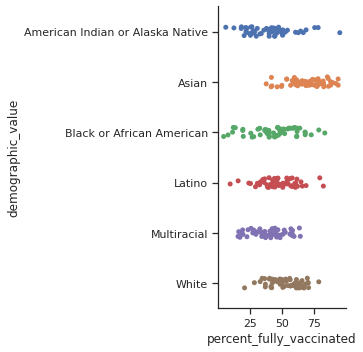

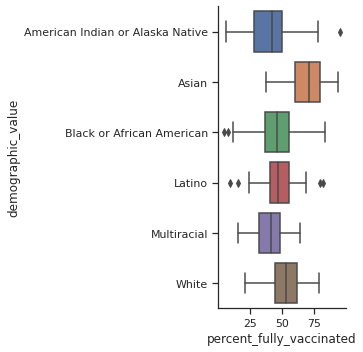

In [ ]:
sns.catplot(x="percent_fully_vaccinated", y="demographic_value", data=final_race_and_county_vax_df)
# black dots/diamonts in the boxplot represent outliers
sns.catplot(x='percent_fully_vaccinated', y='demographic_value', kind='box', data=final_race_and_county_vax_df)

Seeing the differences in fully vaccinated rates along the different demographic groups, we decided to perform an A/B test to determine whether certain groups were getting vaccinated at statistically significantly higher rates than others. Instead of analyzing the differences in each combination of groups, we decided to split the demographics into "traditionally represented" and "traditionally underrepresented" racial groups, using sources about presence in higher education.

In [ ]:
represented = final_race_and_county_vax.where('demographic_value', are.not_equal_to("American Indian or Alaska Native")).where('demographic_value', are.not_equal_to("Black or African American")).where('demographic_value', are.not_equal_to("Latino"))
represented = represented.group('county', sum)
new_percent_full = represented.column('cumulative_fully_vaccinated sum') / represented.column('eligible population sum') * 100
new_percent_one_dose = represented.column('cumulative_at_least_one_dose sum') / represented.column('eligible population sum') * 100
represented = represented.drop('percent_fully_vaccinated sum', 'percent_one_dose sum').with_columns('percent_fully_vaccinated', new_percent_full, 'percent_at_least_one_dose', new_percent_one_dose).drop('demographic_value sum').where('county', are.not_equal_to('Statewide'))
labels = []
for i in range(represented.num_rows):
    labels = np.append(labels, 'represented')
represented = represented.with_column('label', labels)
represented

county,est_population sum,eligible population sum,cumulative_fully_vaccinated sum,cumulative_at_least_one_dose sum,percent_fully_vaccinated,percent_at_least_one_dose,label
Alameda,1.07475e+06,1.01928e+06,768645,818315,75.4103,80.2833,represented
Alpine,791,774,161,184,20.801,23.7726,represented
Amador,29917,28739,14385,16524,50.0539,57.4968,represented
Butte,183347,173980,79809,86969,45.8725,49.9879,represented
Calaveras,36694,35199,14880,16519,42.2739,46.9303,represented
Colusa,9051,8569,3794,4117,44.2759,48.0453,represented
Contra Costa,750054,715066,513445,541452,71.8039,75.7206,represented
Del Norte,19067,18070,8559,9543,47.3658,52.8113,represented
El Dorado,159481,152923,86780,93880,56.7475,61.3904,represented
Fresno,423830,396120,230309,253415,58.1412,63.9743,represented


In [ ]:
underrepresented = final_race_and_county_vax.where('demographic_value', are.not_equal_to("Asian")).where('demographic_value', are.not_equal_to("Multiracial")).where('demographic_value', are.not_equal_to("White"))
underrepresented = underrepresented.group('county', np.sum)
new_percent_full = underrepresented.column('cumulative_fully_vaccinated sum') / underrepresented.column('eligible population sum') * 100
new_percent_one_dose = underrepresented.column('cumulative_at_least_one_dose sum') / underrepresented.column('eligible population sum') * 100
underrepresented = underrepresented.drop('percent_fully_vaccinated sum', 'percent_one_dose sum').with_columns('percent_fully_vaccinated', new_percent_full, 'percent_at_least_one_dose', new_percent_one_dose).drop('demographic_value sum').where('county', are.not_equal_to('Statewide'))
labels = make_array()
for i in np.arange(underrepresented.num_rows):
    labels = np.append(labels, "underrepresented")
underrepresented = underrepresented.with_column('label', labels)
underrepresented

county,est_population sum,eligible population sum,cumulative_fully_vaccinated sum,cumulative_at_least_one_dose sum,percent_fully_vaccinated,percent_at_least_one_dose,label
Alameda,590108,556999,312478,339887,56.1003,61.0211,underrepresented
Alpine,303,291,21,26,7.21649,8.93471,underrepresented
Amador,6989,6675,1924,2318,28.824,34.7266,underrepresented
Butte,43101,40307,17316,19302,42.9603,47.8875,underrepresented
Calaveras,6053,5686,2186,2508,38.4453,44.1083,underrepresented
Colusa,13673,12721,5962,6663,46.8674,52.378,underrepresented
Contra Costa,404179,379414,242771,261726,63.9858,68.9816,underrepresented
Del Norte,7744,7376,1998,2341,27.0879,31.7381,underrepresented
El Dorado,29349,27500,11601,13358,42.1855,48.5745,underrepresented
Fresno,596578,551054,246394,279213,44.7132,50.6689,underrepresented


### A/B Testing

Null: In the total population, the distribution of percent vaccinated is the same for underrepresented racial groups as it is for other racial groups.

Alternative: In the total population, the distribution of percent vaccinated is lower for underrepresented racial groups than for other racial groups.

Test Statistic: (average percent of represented people who are fully vaccinated) - (average percent of underrepresented people who are vaccinated)

In [ ]:
# we shuffle the labels and define the function test_stat() that will calculate test statistics
# we calculate the observed test statistic from the data

represented_df = represented.to_df()
underrepresented_df = underrepresented.to_df()
frames = [represented_df, underrepresented_df]
rep_vs_underrep = pd.concat(frames)
shuffled_labels = rep_vs_underrep.sample(n = 58)['label']

def test_stat(tbl):
    represented_values = tbl.loc[(tbl['label'] == 'represented')]
    underrepresented_values = tbl.loc[(tbl['label'] == 'underrepresented')]
    return represented_values['percent_fully_vaccinated'].mean() - underrepresented_values['percent_fully_vaccinated'].mean()

observed_difference = test_stat(rep_vs_underrep)
observed_difference


8.012822377438376

In [ ]:
# one simulation of the A/B test

def one_simulated_difference():
    shuffled_labels = rep_vs_underrep.sample(n = 116)['label']
    shuffled_table = rep_vs_underrep.drop(columns = ['label'])
    shuffled_table['label'] = shuffled_labels.tolist()
    return test_stat(shuffled_table)

one_simulated_difference()

-2.68538865736231

In [ ]:
# completing 10000 simulations and storing the results in an array

differences = []
for i in range(10000):
    new_difference = one_simulated_difference()
    differences = np.append(differences, new_difference)
differences_df = pd.DataFrame(differences, columns = ['Differences'])
differences_df

,Differences
0,-4.485242
1,1.160728
2,-1.436579
3,-0.402944
4,1.102791
...,...
9995,0.522186
9996,-1.136250
9997,0.670556
9998,-3.119983


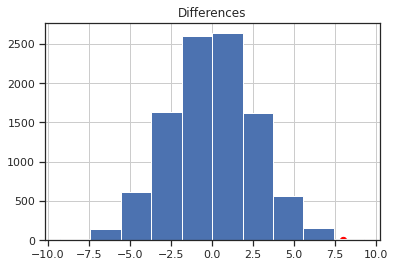

In [ ]:
# plotting the results of the simulations
# the red dot represents the observed test statistic

differences_df.hist()
plt.scatter(observed_difference, -0.002, color='red', s=40);

In [ ]:
above_observed = differences_df.loc[differences_df['Differences'] >= observed_difference]
above_observed.astype(bool).sum(axis=0)/10000

Differences    0.0011
dtype: float64

Our calculated p-value is 0.0011. Using a standard p-value cutoff of 0.05, we would reject the null hypothesis. From our analysis, we would conclude that traditionally underrepresented groups are being vaccinated a lower rates than other groups in California.

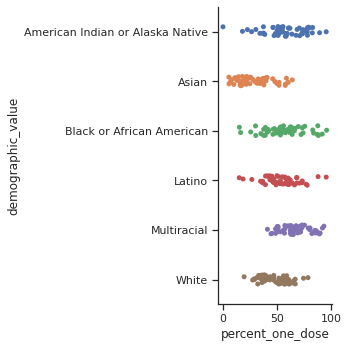

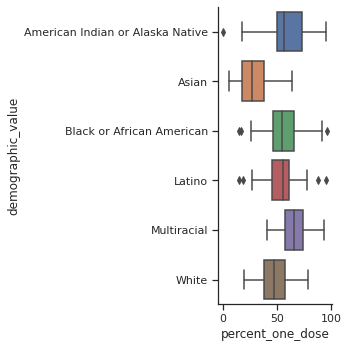

In [ ]:
sns.catplot(x="percent_one_dose", y="demographic_value", data=final_race_and_county_vax_df)
# black dots/diamonts represent outliers
sns.catplot(x='percent_one_dose', y='demographic_value', kind='box', data=final_race_and_county_vax_df)

The above visualizations show that some groups that had low rates of full vaccination have high rates of one dose vaccination, such as the American Indian/Alaska Native and Multiracial demographics. This can potentially be explained by these groups getting vaccinated in larger numbers more recently, or that members in these groups only received one does and did not return for the second.

## Linear Regression between COVID-19 vaccination rates and median income per county

In [ ]:
# importing a table that contains the number of people who are fully vaccinated or received at least one dose per county

vaccines = Table().read_table('covid19vaccinesbycounty.csv')
new_vaccines = vaccines.where('county', are.not_equal_to('All CA Counties')).where('county', are.not_equal_to('All CA and Non-CA Counties')).where('county', are.not_equal_to('Outside California')).where('county', are.not_equal_to('Unknown'))
new_vaccines = new_vaccines.group('county', sum).select('county', 'fully_vaccinated sum', 'at_least_one_dose sum')
new_vaccines

county,fully_vaccinated sum,at_least_one_dose sum
Alameda,1209773,1304079
Alpine,704,810
Amador,19220,22518
Butte,105405,116000
Calaveras,22572,25735
Colusa,11561,12845
Contra Costa,852735,910645
Del Norte,11711,13299
El Dorado,107366,117966
Fresno,529697,596413


In [ ]:
# importing a table that contains the median income per county in 2018
# adding a column with the total population in each county
# using the total population and the new_vaccines table to calculate the percent of fully vaccinated and at least one dose per county

income_table = Table().read_table('incomebycounty.csv')
int_values = income_table.apply(lambda x: int((x[0:x.index(',')] + x[x.index(',') + 1:])), 'Value')
income_table = income_table.drop('Value').with_column("Median income", int_values)
population_array = make_array(1682253, 1204, 40474, 211632,45292,21839,1165927, 27743,191185,1008654,28917,136463, 179702, 19016,909235,152486,68163,32730,10014009,156255,262321,17131,91601,281202,8700,13195,439035,138019,102241,3186989, 404739,19790,2418185,1585055,64209,2181654,3298634,873965,779233,282424,764442,448229,1936259,270861,182155,3236,44076,453491,488863,552878,99633,65829,16112,473117,55620,843843,216403,81575)
income_table = income_table.with_column('Total population', population_array)
full_vax = 100*new_vaccines.column('fully_vaccinated sum')/income_table.column('Total population')
one_dose = 100*new_vaccines.column('at_least_one_dose sum')/income_table.column('Total population')
income_table = income_table.with_columns('Fully vaccinated percentage', full_vax, 'At least one dose percentage', one_dose)
income_table_df = income_table.to_df()
income_table_df

,County,Median income,Total population,Fully vaccinated percentage,At least one dose percentage
0,Alameda,92574,1682253,71.913856,77.519790
1,Alpine,64688,1204,58.471761,67.275748
2,Amador,61198,40474,47.487276,55.635717
3,Butte,48443,211632,49.805795,54.812127
4,Calaveras,58151,45292,49.836616,56.820189
5,Colusa,56704,21839,52.937406,58.816796
6,Contra Costa,93712,1165927,73.137941,78.104804
7,Del Norte,45258,27743,42.212450,47.936416
8,El Dorado,80582,191185,56.158171,61.702539
9,Fresno,51261,1008654,52.515233,59.129593


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
The correlation coefficient is: 0.7889963375011697


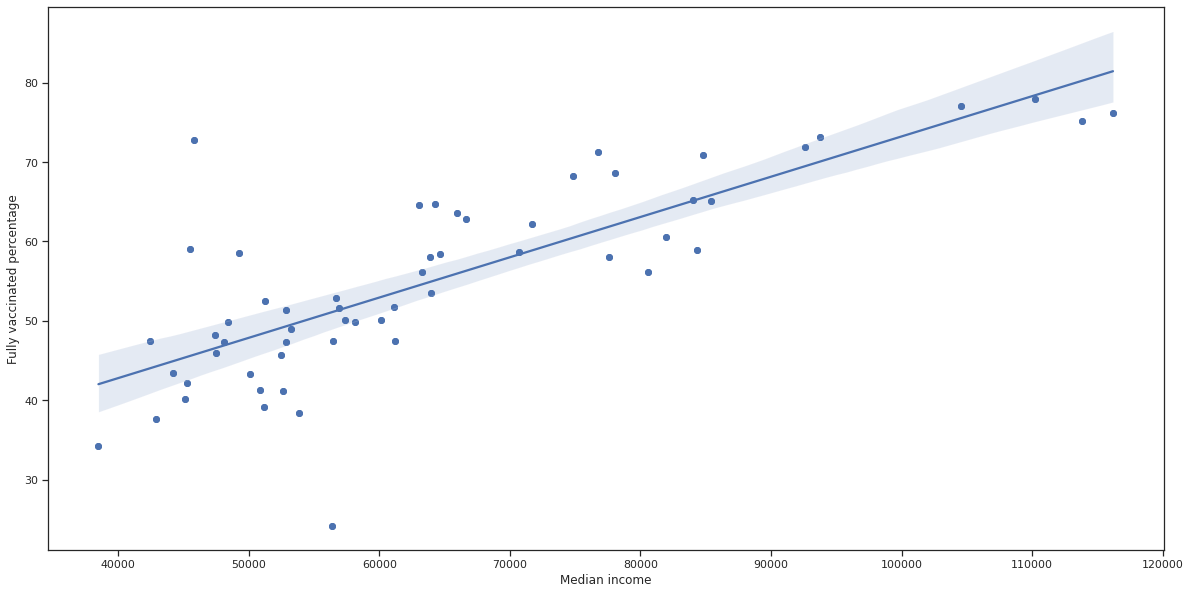

In [ ]:
# plotting fully vaccinated percentage vs. median income

fig, ax = plt.subplots(figsize = (20,10))
plt.scatter(data = income_table_df, x = "Median income", y = "Fully vaccinated percentage")

plt.xlabel("Median income")
plt.ylabel("Fully vaccinated percentage")
income_and_fully_vax = income_table_df[["Median income", "Fully vaccinated percentage"]]
sns.regplot(income_and_fully_vax['Median income'], income_and_fully_vax['Fully vaccinated percentage'])

print("The correlation coefficient is: " + str(income_and_fully_vax.corr(method ='pearson').iloc[0, 1]))

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
The correlation coefficient is: 0.7431907440294258


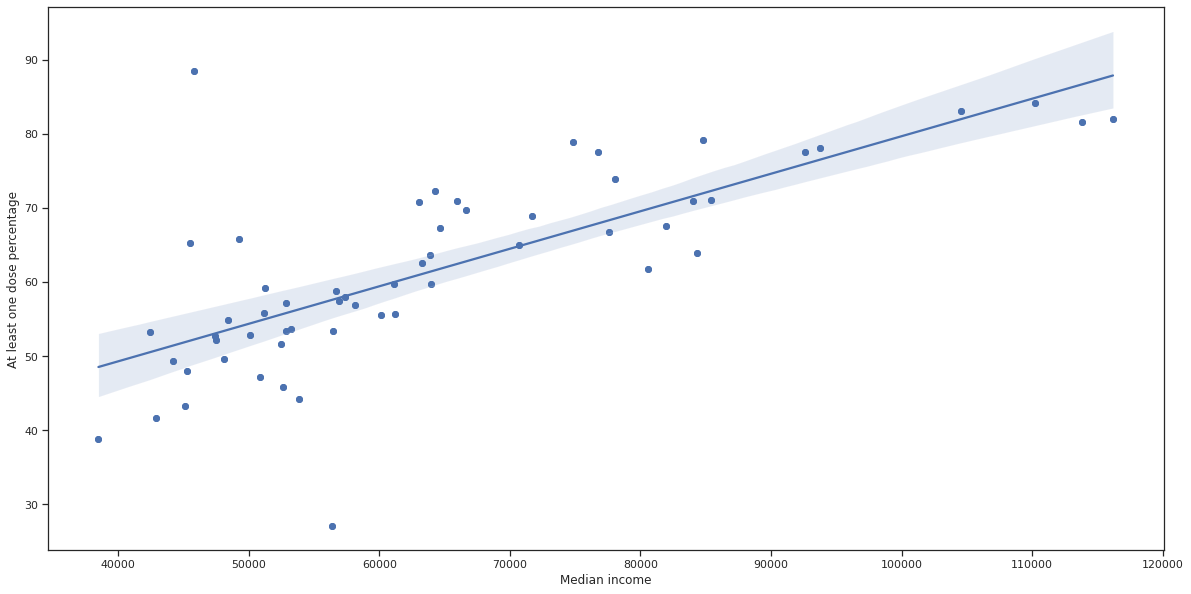

In [ ]:
# plotting at least one dose percentage vs. median income

fig, ax = plt.subplots(figsize = (20,10))
plt.scatter(data = income_table_df, x = "Median income", y = "At least one dose percentage")

plt.xlabel("Median income") # You need to manually add these in!
plt.ylabel("At least one dose percentage")
income_and_one_dose = income_table_df[["Median income", "At least one dose percentage"]]
sns.regplot(income_and_one_dose['Median income'], income_and_one_dose['At least one dose percentage'])

print("The correlation coefficient is: " + str(income_and_one_dose.corr(method ='pearson').iloc[0, 1]))

The graphs above show that there is a strong, positive correlation between median income and the percentage of people who are fully vaccinated or have at least one dose in each county. Seeing that there is a correlation, we decided to create linear regression models that would be able to predict the percentage of vaccinated people given the median income of an area.

In [ ]:
# Linear model predicting fully vaccinated percentage from median income

train_data, test_data = train_test_split(income_table_df, test_size = 0.20, random_state = 50)

X_train = train_data[['Median income']]
y_train = train_data['Fully vaccinated percentage']

X_test = test_data[['Median income']]
y_test = test_data['Fully vaccinated percentage']

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("The coefficient of determination is " + str(metrics.r2_score(y_test, y_pred)))
print("The mean squared error is " + str(mean_squared_error(y_test, y_pred)))

The coefficient of determination is 0.7402790757964923
The mean squared error is 25.511459853252248


In [ ]:
# Linear model predicting one dose percentage from median income

X_train = train_data[['Median income']]
y_train = train_data['At least one dose percentage']

X_test = test_data[['Median income']]
y_test = test_data['At least one dose percentage']

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("The coefficient of determination is " + str(metrics.r2_score(y_test, y_pred)))
print("The mean squared error is " + str(mean_squared_error(y_test, y_pred)))

The coefficient of determination is 0.6936244616227263
The mean squared error is 28.336745087480566


The coefficient of determination shows the proportion of outcomes that can be explained by the model. In order to reduce the mean squared error for the models, we decided to standardize the units by converting each measure to the number of standard deviations it is away from its mean.

In [ ]:
standardized_income = (income_table_df["Median income"]-income_table_df["Median income"].mean())/income_table_df["Median income"].std()
standardized_full_vax = (income_table_df["Fully vaccinated percentage"]-income_table_df["Fully vaccinated percentage"].mean())/income_table_df["Fully vaccinated percentage"].std()
standardized_one_dose = (income_table_df["At least one dose percentage"]-income_table_df["At least one dose percentage"].mean())/income_table_df["At least one dose percentage"].std()
standards = {"Median income": standardized_income, "Fully vaccinated percentage": standardized_full_vax, "At least one dose percentage": standardized_one_dose}
standardized_income_table_df = pd.DataFrame(data=standards)

In [ ]:
train_data, test_data = train_test_split(standardized_income_table_df, test_size = 0.20, random_state = 50)

X_train = train_data[['Median income']]
y_train = train_data['Fully vaccinated percentage']

X_test = test_data[['Median income']]
y_test = test_data['Fully vaccinated percentage']

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("The coefficient of determination is " + str(metrics.r2_score(y_test, y_pred)))
print("The mean squared error is " + str(mean_squared_error(y_test, y_pred)))


The coefficient of determination is 0.7402790757964932
The mean squared error is 0.17516638882496108


In [ ]:
X_train = train_data[['Median income']]
y_train = train_data['At least one dose percentage']

X_test = test_data[['Median income']]
y_test = test_data['At least one dose percentage']

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("The coefficient of determination is " + str(metrics.r2_score(y_test, y_pred)))
print("The mean squared error is " + str(mean_squared_error(y_test, y_pred)))

The coefficient of determination is 0.6936244616227262
The mean squared error is 0.17316482475617587


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25e07b76-cfe9-463b-b115-80e99fb8e038' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>